STEP 1

Data Ingestion & Environment Setup

importing libraries

In [40]:
import pandas as pd
import numpy as np
import mlflow 
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

load dataset

In [41]:
df = pd.read_csv("C:/Users/yashu/OneDrive/MLOPs/PROJECT_3_BREAST_CANCER/data/raw/breast_cancer.csv")

In [42]:
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [44]:
df.isnull().sum()


842302      0
M           0
17.99       0
10.38       0
122.8       0
1001        0
0.1184      0
0.2776      0
0.3001      0
0.1471      0
0.2419      0
0.07871     0
1.095       0
0.9053      0
8.589       0
153.4       0
0.006399    0
0.04904     0
0.05373     0
0.01587     0
0.03003     0
0.006193    0
25.38       0
17.33       0
184.6       0
2019        0
0.1622      0
0.6656      0
0.7119      0
0.2654      0
0.4601      0
0.1189      0
dtype: int64

In [45]:
df.describe()

,842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [46]:
df.columns


Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')

In [47]:
columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]


In [48]:
df = pd.read_csv("C:/Users/yashu/OneDrive/MLOPs/PROJECT_3_BREAST_CANCER/data/raw/breast_cancer.csv")

In [49]:
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Data Validation

In [50]:
columns = [
    "id","diagnosis",
    "radius_mean","texture_mean","perimeter_mean","area_mean",
    "smoothness_mean","compactness_mean","concavity_mean",
    "concave_points_mean","symmetry_mean","fractal_dimension_mean",
    "radius_se","texture_se","perimeter_se","area_se",
    "smoothness_se","compactness_se","concavity_se",
    "concave_points_se","symmetry_se","fractal_dimension_se",
    "radius_worst","texture_worst","perimeter_worst","area_worst",
    "smoothness_worst","compactness_worst","concavity_worst",
    "concave_points_worst","symmetry_worst","fractal_dimension_worst"
]

df = pd.read_csv(
    "data/raw/breast_cancer.csv",
    header=None
)

df.columns = columns


In [51]:
df.columns.tolist()


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [53]:
if len(df.columns) == 32:
    print(" TC1 PASSED – Correct number of columns")
else:
    raise Exception(" TC1 FAILED – Incorrect schema")


 TC1 PASSED – Correct number of columns


STEP 2

Encode Target Column

In [54]:
# Encode Target Column
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

explanation:After encoding the target variable, we observed that the dataset contains 357 benign and 212 malignant cases, which represents a moderately imbalanced but realistic medical dataset.

Class Distribution

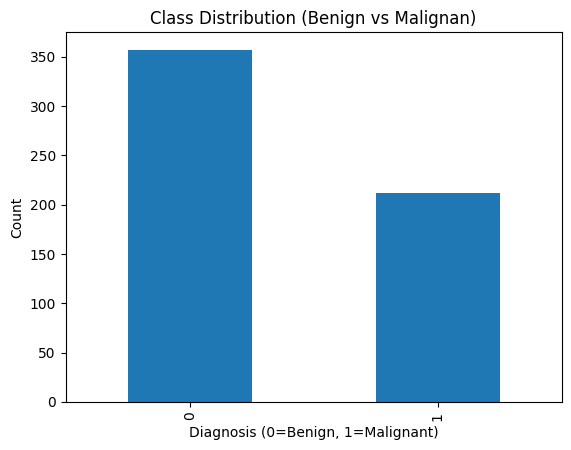

In [73]:
import matplotlib.pyplot as plt

df["diagnosis"].value_counts().plot(kind="bar")
plt.title("Class Distribution (Benign vs Malignan)")
plt.xlabel("Diagnosis (0=Benign, 1=Malignant)")
plt.ylabel("Count")
plt.show()

Graph shows the class distribution of benign and malignant tumors in the dataset.The dataset has more benign cases than malignant ones, indicating a slight class imbalance. 

Feature/Target Split

In [55]:
# spliting the data for training and testing
x = df.drop(["id", "diagnosis"], axis=1)
y = df["diagnosis"]

Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (455, 30)
Test shape: (114, 30)


divided the dataset into training data to teach the model and testing data to check how well it learned

STEP 3 — Model Training + Experiment Tracking (MLflow)

In [61]:
mlflow.set_experiment("Breast Cancer Classification MLOps")


<Experiment: artifact_location='file:///c:/Users/yashu/OneDrive/MLOPs/PROJECT_3_BREAST_CANCER/mlruns/1', creation_time=1768486535689, experiment_id='1', last_update_time=1768486535689, lifecycle_stage='active', name='Breast Cancer Classification MLOps', tags={}>

Train Model Mlflow

In [62]:
with mlflow.start_run():
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("max_iter", 1000)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "model")

    print("Model trained successfully")
    print("Accuracy:", accuracy)

2026/01/16 09:23:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Model trained successfully
Accuracy: 0.9736842105263158


trained a Logistic Regression model and tracked its parameters, accuracy, and artifacts using MLflow. The model achieved around 97% accuracy.

Accuracy Bar

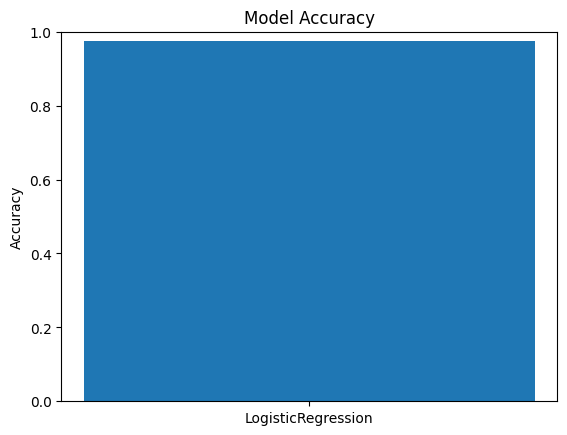

In [74]:
plt.bar(["LogisticRegression"], [accuracy])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

STEP 5 Failure Handling

In [ ]:
try:
    # Intentionally wrong path to simulate failure
    pd.read_csv("data/raw/non_existent_file.csv")

    print(" TC4 FAILED - Error not detected")

except Exception as e:
    print(" TC4 PASSED - Failure handled safely")
    print("Logged error:", e)


 TC4 PASSED – Failure handled safely
Logged error: [Errno 2] No such file or directory: 'data/raw/non_existent_file.csv'


In [66]:
import mlflow

experiment = mlflow.get_experiment_by_name("Breast Cancer Classification MLOps")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

run_id = runs.iloc[0].run_id
print("Run ID:", run_id)


Run ID: 83ea7a35f97947ec9964ac65d2883b1e


loaded the trained model directly from MLflow using the run ID and verified deployment by making predictions

In [67]:
import mlflow.sklearn
run_id = "83ea7a35f97947ec9964ac65d2883b1e"
model_uri = f"runs:/{run_id}/model"

loaded_model = mlflow.sklearn.load_model(model_uri)

print("Model Loaded")

Model Loaded


In [68]:
sample_input = x_test[0].reshape(1, -1)
prediction = loaded_model.predict(sample_input)

print("Prediction output:", prediction)


Prediction output: [0]


The model predicted the label 0, which corresponds to a benign tumor. if the model is predicting the label  1 that is corresponds to malignant.

In [69]:
for i in range(len(y_test)):
    if y_test.iloc[i]:
        sample = x_test[i].reshape(1, -1)
        print("prediction:", loaded_model.predict(sample))
        break

prediction: [1]
